## Breast Cancer  Clustering: ANN
Using Pandas to read and explore the dataset.
Using Scikit-Learn to preprocess the data before training.
Using Pandas for cleansing un-needed columns.
Using K-Means in Clustering the data.

The company needs you to cluster the two datasets you have worked on so far into groups using your knowledge of clustering for them to study the best insurance plans for new patients based on what cluster they belong to.
Cluster the data in both the Wisconsin Dataset and the Insurance Dataset.
Implement different clustering techniques.

In [43]:
## Load libraries
import pandas as pd
from typing import List, Dict, Union 
import numpy as np
import csv
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder
import seaborn as sbn 
from matplotlib import pyplot as plt

import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [72]:
## Read data
df_breast = pd.read_csv("data_refined.csv") 
df_insurance = pd.read_csv("insurance.csv")

In [5]:
## Preprocessing Insurance dataset:
## drop missing Data
df_insurance=df_insurance.dropna()
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
## Encode Insurance Dataset: 
numerical= df_insurance._get_numeric_data()

scaler = MinMaxScaler()
numerical_scale = pd.DataFrame(scaler.fit_transform(numerical))
numerical_scale.columns = numerical.columns
numerical_scale

categorical_cols = list(set(df_insurance.columns) - set(numerical_scale.columns))
cat = df_insurance[df_insurance.columns.intersection(categorical_cols)]
cat_oh = pd.get_dummies(cat, dtype=int)

insurance_encoded = pd.concat([numerical_scale, cat_oh.set_index(numerical_scale.index)], axis=1)
insurance_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,0.251611,1,0,0,1,0,0,0,1
1,0.000000,0.479150,0.2,0.009636,0,1,1,0,0,0,1,0
2,0.217391,0.458434,0.6,0.053115,0,1,1,0,0,0,1,0
3,0.326087,0.181464,0.0,0.333010,0,1,1,0,0,1,0,0
4,0.304348,0.347592,0.0,0.043816,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0.151299,0,1,1,0,0,1,0,0
1334,0.000000,0.429379,0.0,0.017305,1,0,1,0,1,0,0,0
1335,0.000000,0.562012,0.0,0.008108,1,0,1,0,0,0,1,0
1336,0.065217,0.264730,0.0,0.014144,1,0,1,0,0,0,0,1


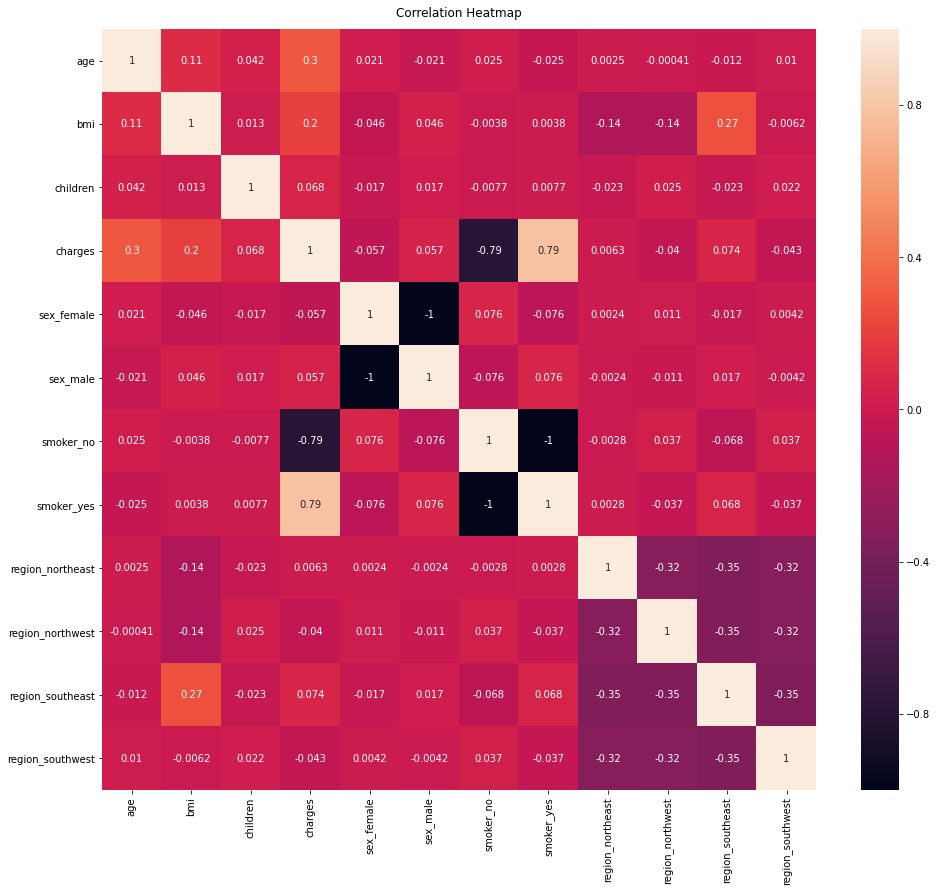

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,0.251611,0,1,0,0,0,1
1,0.000000,0.479150,0.2,0.009636,1,0,0,0,1,0
2,0.217391,0.458434,0.6,0.053115,1,0,0,0,1,0
3,0.326087,0.181464,0.0,0.333010,1,0,0,1,0,0
4,0.304348,0.347592,0.0,0.043816,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0.151299,1,0,0,1,0,0
1334,0.000000,0.429379,0.0,0.017305,0,0,1,0,0,0
1335,0.000000,0.562012,0.0,0.008108,0,0,0,0,1,0
1336,0.065217,0.264730,0.0,0.014144,0,0,0,0,0,1


In [19]:
## feature selection
plt.figure(figsize=(16, 14))
heatmap = sbn.heatmap(insurance_encoded.corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

### Select either of binary columns 
insuranceX = insurance_encoded.drop(['sex_female', 'smoker_no'], axis=1)
insuranceX

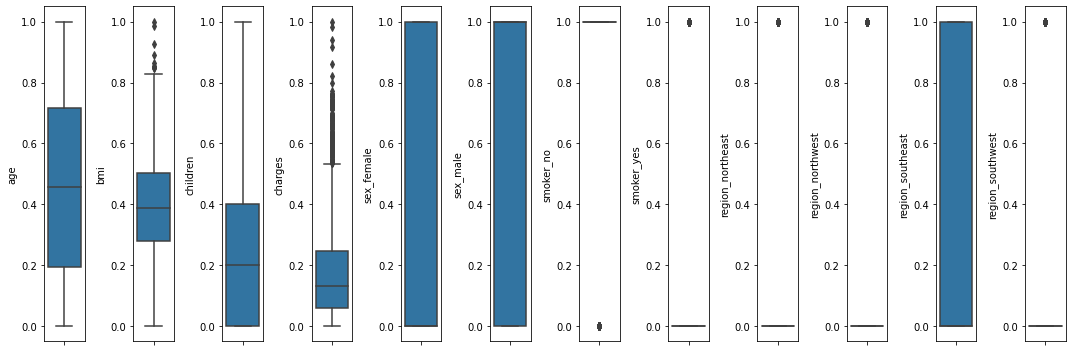

In [27]:
num_df = insurance_encoded._get_numeric_data()
fig, axes = plt.subplots(ncols=len(num_df.columns), figsize=(15,5))
for col, ax in zip(num_df, axes):
    sbn.boxplot(num_df[col], ax=ax, orient="v")
            #num_df[col].boxplot()

plt.tight_layout()    
plt.savefig('boxplot_numeric.png')
plt.show()

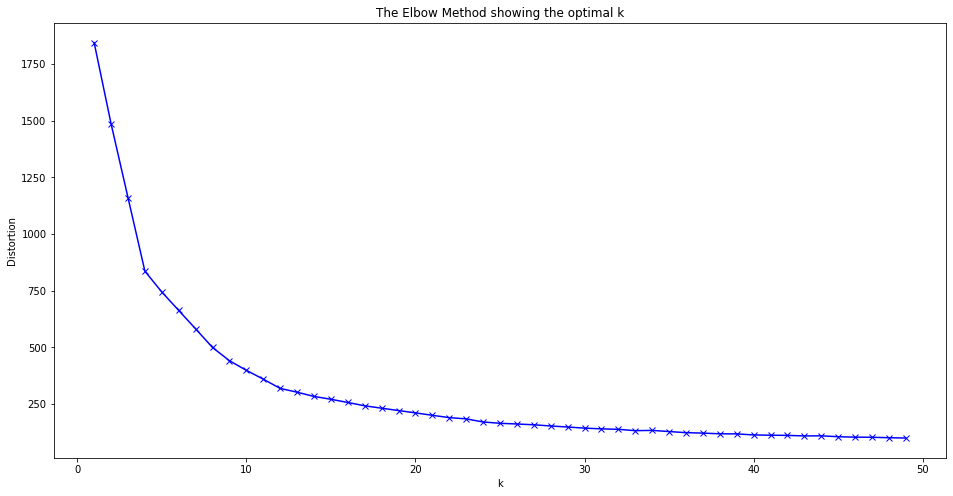

In [32]:
# clustering Use K-Means and Mean-shift to fit your data. 
# insurance

#Get optimal k for K-Means using the elbow curve method.
distortions = []
K = range(1,50)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(insuranceX)
    distortions.append(kmeanModel.inertia_)
        ## Plot distortions vs Values of K
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## From elbow plot: otimal K= 4

In [48]:
### Kmeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(insuranceX)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

#evaluate different training models using a score function
pred = kmeans.predict(insuranceX)
SS= silhouette_score(insuranceX, pred)
DBS = davies_bouldin_score(insuranceX, pred)
print("\n\nsilhouette_score: ",SS)
print("davies_bouldin_score: ", DBS)

[0 1 1 ... 1 0 3]
[[ 4.66421405e-01  3.93774963e-01  2.28307692e-01  1.79175140e-01
   5.01538462e-01  1.78461538e-01 -1.66533454e-16 -4.44089210e-16
   6.66133815e-16  1.00000000e+00]
 [ 4.55207836e-01  4.68011542e-01  2.09890110e-01  2.17300107e-01
   5.19230769e-01  2.50000000e-01 -1.94289029e-16 -3.05311332e-16
   1.00000000e+00 -3.05311332e-16]
 [ 4.62359098e-01  3.55488380e-01  2.09259259e-01  1.96086100e-01
   5.03086420e-01  2.06790123e-01  1.00000000e+00 -4.16333634e-16
   6.66133815e-16 -4.16333634e-16]
 [ 4.60802676e-01  3.56195443e-01  2.29538462e-01  1.80302668e-01
   4.95384615e-01  1.78461538e-01 -1.66533454e-16  1.00000000e+00
   6.66133815e-16 -4.44089210e-16]]


silhouette_score:  0.4167551341058094
davies_bouldin_score:  1.0993977512904791


In [66]:
# Try different bandwidth for the mean-shift clustering.
## mean shift clustering
K = range(2,8)
for k in K:
    meanshift = MeanShift(bandwidth=k).fit(insuranceX)
    pred = meanshift.fit_predict(insuranceX)
    print('K =', k)
    print(meanshift.labels_)
    print(meanshift.cluster_centers_)

    

K = 2
[0 0 0 ... 0 0 0]
[[0.46102229 0.39557161 0.21898356 0.19391586 0.50523169 0.20478326
  0.24215247 0.24289985 0.27204783 0.24289985]]
K = 3
[0 0 0 ... 0 0 0]
[[0.46102229 0.39557161 0.21898356 0.19391586 0.50523169 0.20478326
  0.24215247 0.24289985 0.27204783 0.24289985]]
K = 4
[0 0 0 ... 0 0 0]
[[0.46102229 0.39557161 0.21898356 0.19391586 0.50523169 0.20478326
  0.24215247 0.24289985 0.27204783 0.24289985]]
K = 5
[0 0 0 ... 0 0 0]
[[0.46102229 0.39557161 0.21898356 0.19391586 0.50523169 0.20478326
  0.24215247 0.24289985 0.27204783 0.24289985]]
K = 6
[0 0 0 ... 0 0 0]
[[0.46102229 0.39557161 0.21898356 0.19391586 0.50523169 0.20478326
  0.24215247 0.24289985 0.27204783 0.24289985]]
K = 7
[0 0 0 ... 0 0 0]
[[0.46102229 0.39557161 0.21898356 0.19391586 0.50523169 0.20478326
  0.24215247 0.24289985 0.27204783 0.24289985]]


In [61]:
# DBSCAN clustering
clustering = DBSCAN().fit(insuranceX)
print(clustering.labels_)

#evaluate different training models using a score function
pred = clustering.fit_predict(insuranceX)
SS= silhouette_score(insuranceX, pred)
DBS = davies_bouldin_score(insuranceX, pred)
print("\n\nsilhouette_score: ",SS)
print("davies_bouldin_score: ", DBS)

[ 0  1  1 ...  3 11 15]


silhouette_score:  0.5130412927417631
davies_bouldin_score:  0.8047440455090097


## Breast cancer dataset: 
Its already cleaned so we will just do the clusterting analysis on this


In [68]:
df_breast

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se,symmetry_worst
0,1,0.521037,0.022658,0.593753,0.792037,0.686364,0.605518,0.120469,0.159296,0.311645,0.598462
1,1,0.643144,0.272574,0.289880,0.181768,0.379798,0.141323,0.082589,0.119387,0.084539,0.233590
2,1,0.601496,0.390260,0.514309,0.431017,0.509596,0.211247,0.094303,0.150831,0.205690,0.403706
3,1,0.210090,0.360839,0.811321,0.811361,0.776263,1.000000,0.175875,0.251453,0.728148,1.000000
4,1,0.629893,0.156578,0.430351,0.347893,0.378283,0.186816,0.093065,0.332359,0.136179,0.157500
...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.690000,0.428813,0.526948,0.296055,0.336364,0.132056,0.197976,0.291906,0.045843,0.097575
565,1,0.622320,0.626987,0.407782,0.257714,0.349495,0.113100,0.464728,0.137879,0.156160,0.198502
566,1,0.455251,0.621238,0.288165,0.254340,0.267677,0.137321,0.157974,0.142435,0.074548,0.128721
567,1,0.644564,0.663510,0.588336,0.790197,0.675253,0.425442,0.272896,0.163477,0.216103,0.497142


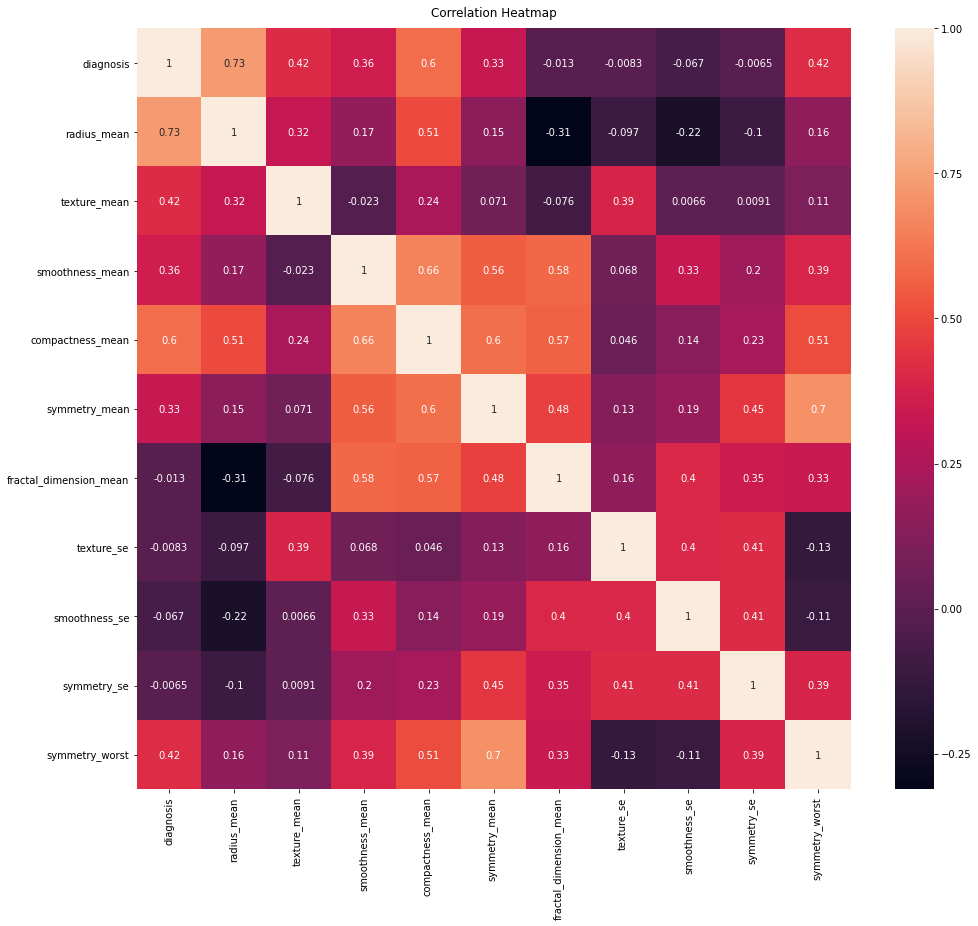

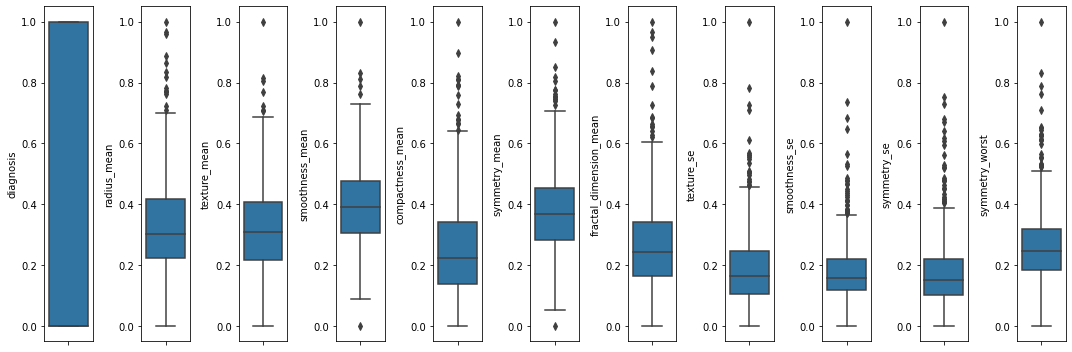

In [75]:
## feature selection
plt.figure(figsize=(16, 14))
heatmap = sbn.heatmap(df_breast.corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

df_breast
fig, axes = plt.subplots(ncols=len(df_breast.columns), figsize=(15,5))
for col, ax in zip(df_breast, axes):
    sbn.boxplot(df_breast[col], ax=ax, orient="v")
            #num_df[col].boxplot()

plt.tight_layout()    
plt.savefig('boxplot_numeric.png')
plt.show()

In [73]:
df_breast

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se,symmetry_worst
0,1,0.521037,0.022658,0.593753,0.792037,0.686364,0.605518,0.120469,0.159296,0.311645,0.598462
1,1,0.643144,0.272574,0.289880,0.181768,0.379798,0.141323,0.082589,0.119387,0.084539,0.233590
2,1,0.601496,0.390260,0.514309,0.431017,0.509596,0.211247,0.094303,0.150831,0.205690,0.403706
3,1,0.210090,0.360839,0.811321,0.811361,0.776263,1.000000,0.175875,0.251453,0.728148,1.000000
4,1,0.629893,0.156578,0.430351,0.347893,0.378283,0.186816,0.093065,0.332359,0.136179,0.157500
...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.690000,0.428813,0.526948,0.296055,0.336364,0.132056,0.197976,0.291906,0.045843,0.097575
565,1,0.622320,0.626987,0.407782,0.257714,0.349495,0.113100,0.464728,0.137879,0.156160,0.198502
566,1,0.455251,0.621238,0.288165,0.254340,0.267677,0.137321,0.157974,0.142435,0.074548,0.128721
567,1,0.644564,0.663510,0.588336,0.790197,0.675253,0.425442,0.272896,0.163477,0.216103,0.497142


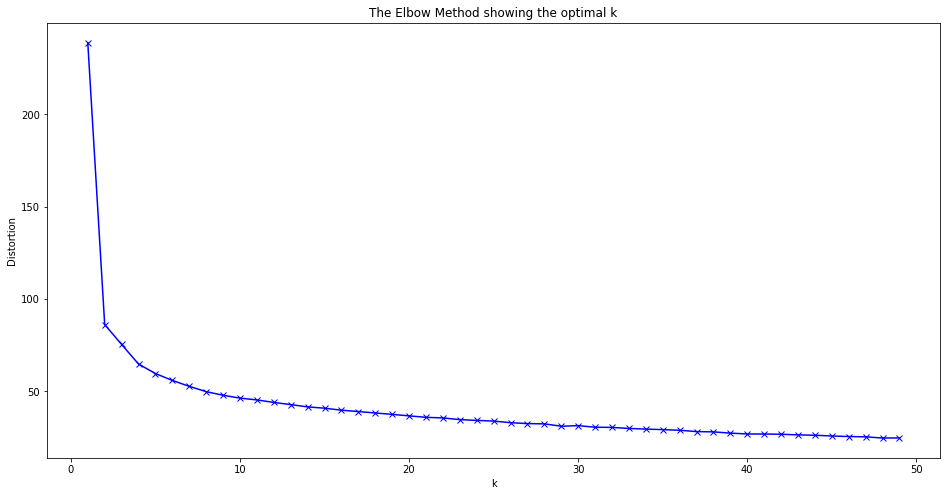

In [76]:
#Get optimal k for K-Means using the elbow curve method.
distortions = []
K = range(1,50)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_breast)
    distortions.append(kmeanModel.inertia_)
        ## Plot distortions vs Values of K
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [77]:
### Kmeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_breast)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

#evaluate different training models using a score function
pred = kmeans.predict(df_breast)
SS= silhouette_score(df_breast, pred)
DBS = davies_bouldin_score(df_breast, pred)
print("\n\nsilhouette_score: ",SS)
print("davies_bouldin_score: ", DBS)

[3 1 1 3 1 3 1 3 3 3 1 1 3 1 3 3 1 3 1 0 2 2 3 1 1 3 3 1 3 1 3 3 3 1 3 1 1
 0 1 1 1 3 3 3 1 1 2 3 0 0 0 0 0 1 1 0 1 3 0 2 2 2 3 2 1 3 2 0 2 0 1 2 1 1
 0 1 2 3 3 0 2 2 3 3 0 1 1 1 2 2 0 1 0 0 1 1 2 2 0 1 1 2 0 2 2 3 2 0 3 0 2
 2 2 2 2 0 2 3 3 1 0 1 3 0 0 0 1 1 2 1 2 1 1 0 1 1 0 0 3 2 0 1 2 0 0 2 3 2
 0 0 2 2 2 0 0 0 1 0 0 0 2 1 1 2 1 0 0 1 1 0 0 1 3 2 2 2 2 1 0 0 1 3 1 0 1
 2 1 0 2 0 3 0 2 3 3 0 3 1 1 1 0 1 3 3 2 1 2 1 2 0 1 0 1 1 3 3 2 0 1 1 0 0
 2 1 0 0 0 0 0 3 1 0 0 1 0 0 1 1 0 1 0 0 2 0 1 2 0 0 2 0 1 0 1 1 1 1 1 3 3
 3 1 1 1 1 1 1 2 0 0 2 0 0 1 2 1 2 0 1 0 0 1 0 1 1 0 0 0 0 2 2 2 0 2 0 0 0
 0 1 0 2 1 0 3 2 0 0 0 0 0 0 0 0 0 0 2 0 0 1 2 0 2 1 0 3 0 0 0 0 1 1 1 0 2
 0 0 1 0 1 2 1 0 2 2 1 2 2 0 0 0 2 0 3 3 1 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 1
 3 0 1 1 0 0 2 0 0 3 2 0 0 2 0 1 0 0 2 1 0 2 3 3 2 0 0 0 0 0 3 0 0 0 0 2 0
 0 1 0 0 0 0 0 1 2 2 3 0 0 0 2 2 0 2 0 2 0 0 0 3 2 1 1 0 1 0 0 0 0 0 1 0 2
 1 2 1 0 0 1 0 1 0 0 0 0 2 0 0 0 1 1 0 0 0 0 0 2 1 2 2 0 0 2 0 0 0 0 0 3 0
 0 0 0 0 2 0 1 2 1 0 0 1 

In [79]:
# DBSCAN clustering
clustering = DBSCAN().fit(df_breast)
print(clustering.labels_)

#evaluate different training models using a score function
pred = clustering.fit_predict(df_breast)
SS= silhouette_score(df_breast, pred)
DBS = davies_bouldin_score(df_breast, pred)
print("\n\nsilhouette_score: ",SS)
print("davies_bouldin_score: ", DBS)

[ 0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  1  1  1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0
  1  1  1  1  1  0  0  1  0  0  1  1  1  1  0  1  0  0  1  1  1  1  0  1
  0  0  1  0  1  0 -1  1  1  1  0  0  1  0  0  0  1  1  1  0  1  1  0  0
  1  1  1  0  0  1  1  1  1  0  1  1  0  1  1  1  1  1  1  1  1  0  0  0
  1  0 -1  1  1  1  0  0  1  0  1  0  0  1  0  0  1  1  0  1  1  0  1  1
  1  1  0  1  1  1  1  1  1  1  1  1  0  1  1  1  1  0  0  1  0  1  1  0
  0  1  1  0  0  1  1  1  1  0  1  1  0  0  0  1  0  1  0  1  1  1  0  1
 -1  0  0  1  0  0  0  0  1  0  0  0  1  0  1  0  1  1  0  1 -1 -1  0  0
  1  1  0  0  1  1  1  0  1  1  1  1  1  0  0  1  1  0  1  1  0  0  1  0
  1  1  1  1  0  1  1  1  1  1  0  1  0  0  0  0  0  0 -1  0  0  0  0  0
  0  0  1  1  1  1  1  1  0  1  0  1  1  0  1  1  0  1  0  0  1  1  1  1
  1  1  1  1  1  1  1  1  1  0  1  1  0  1  0  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  0  1  1  1  0  1  0  1  1  1  1  0

## Conclusion
For insurance Dataset: Using elbow plot with ks ranging from K-50, a k=4 was optimal. Which was used to fir kmeans clusters. 
Further meanShift clustering was used with different bandwidth.
And among Kmeans and DBSCAN: DBSCAN produced better clustring for this dataset as suggested by the higher Silhoutte score (0.5 [DBSCAN] vs 0.416 [Kmeans]) and lower DBS score (0.80 [DBSCAN] , 1.09 [Kmeans])


For breast cancer Dtaset: Using elbow plot with ks ranging from K-50, a k=3 was optimal. Which was used to for kmeans clusters. 
And among Kmeans and DBSCAN: DBSCAN produced better clustring for this dataset too as suggested by the higher Silhoutte score (0.57 [DBSCAN] vs 0.25 [Kmeans]), though DBS score is also marginally higher in DBSCAN(1.61 [DBSCAN] , 1.59 [Kmeans])

I would suggest usinh DBSCAN to cluster both datasets. 